In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [95]:
x, y = make_blobs(n_samples=500, n_features=2, centers= 5)

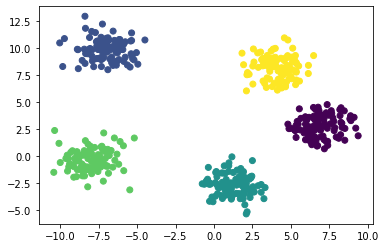

In [96]:
plt.scatter(x[:, 0], x[:,1], c = y[:])

In [97]:
k = 5
color = ["green", "blue", "red", "yellow", "orange"]
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((x.shape[1], )) - 1)
    clusters[i] = {
        'center' : center,
        'points' : [],
        'color' : color[i]
    }
print(clusters, sep = "\n")

{0: {'center': array([-7.08950779,  3.06276353]), 'points': [], 'color': 'green'}, 1: {'center': array([ 1.52768368, -0.14951322]), 'points': [], 'color': 'blue'}, 2: {'center': array([ 6.87670859, -0.43502654]), 'points': [], 'color': 'red'}, 3: {'center': array([-2.8814313 , -1.53870798]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 6.0083276 , -0.82067241]), 'points': [], 'color': 'orange'}}


In [98]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
def ass_points(x):
    for i in range(x.shape[0]):
        dist = []
        for kx in range(k):
            d = distance(x[i], clusters[kx]['center'])
            dist.append(d)
        idx = np.argmin(dist)
        clusters[idx]['points'].append(x[i])
def update_cluster():
    for kx in range(k):
        try : 
            clusters[kx]['center'] = np.array(clusters[kx]['points']).mean(axis = 0)
            clusters[kx]['points'] = []
        except:
            pass
def plot_clusters():
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c = clusters[kx]['color'])
        except:
            pass
        plt.scatter(clusters[kx]['center'][0], clusters[kx]['center'][1], color = 'black', marker = '^')

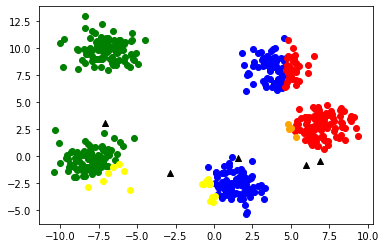

In [99]:
ass_points(x)
plot_clusters()
update_cluster()


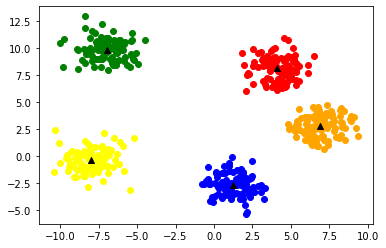

In [104]:
ass_points(x)
plot_clusters()
update_cluster()


### Implementation using scikit
 - by using random intitial cluster center our code can suck with local minima
 - sckit escape that by using k++

In [107]:
from sklearn.cluster import KMeans

In [108]:
km = KMeans(n_clusters=5)

In [110]:
km.fit(x, y)
centers = km.cluster_centers_

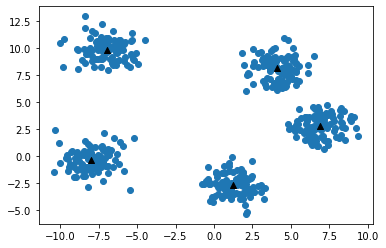

In [111]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], marker = '^', c = 'black')

### DBSCAN : For non linear data
- Density Based Spatial Clustering of Applications with Noise
- Based upon on the idea, that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explores neigbours and so on, so it groups regions based upon density!

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [118]:
x, y = make_moons(n_samples= 200, noise = 0.10)

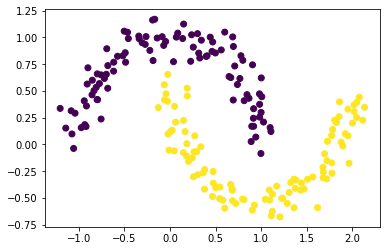

In [120]:
plt.scatter(x[:, 0], x[:, 1], c = y[:])

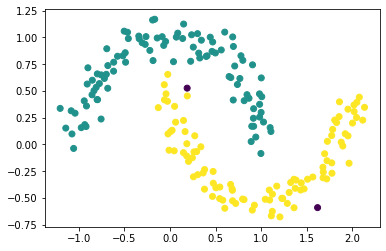

In [140]:
dbs = DBSCAN(eps = 0.2, min_samples= 5)
y = dbs.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1] , c = y[:])